In [2]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [4]:
train_df.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


In [8]:
train_df.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000,30200.000000
mean,159.732649,12.037815,250.563457,159.175728,41.091447,263.247215,158.474536,25.394260,263.438285,157.047417,12.074648,2.288079,0.109868
std,123.752781,24.925334,84.403350,101.573057,23.179017,74.064922,102.200293,8.146126,73.778416,101.721601,9.414261,2.050746,0.312730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,63.000000,0.000000,222.800000,88.000000,24.400000,223.700000,87.000000,22.220000,223.700000,87.000000,4.700000,2.000000,0.000000
50%,118.000000,1.000000,234.000000,117.500000,30.800000,243.000000,112.000000,23.320000,242.800000,108.000000,9.080000,2.000000,0.000000
75%,228.000000,22.000000,289.600000,223.000000,45.900000,290.300000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


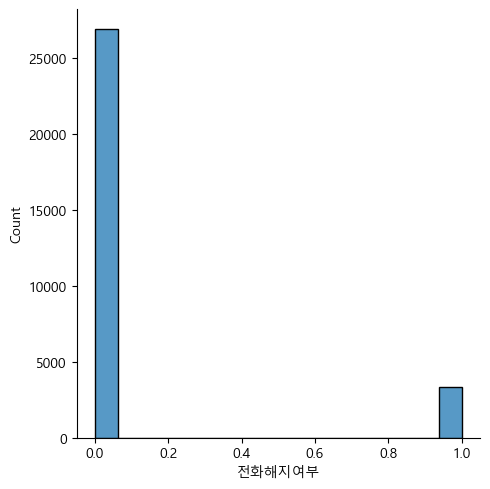

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.displot(x = train_df['전화해지여부'])
plt.show()

In [12]:
q1 = train_df["저녁통화시간"].quantile(0.25)
q2 = train_df["저녁통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new = train_df[(min_limit<=train_df["저녁통화시간"]) & (train_df["저녁통화시간"]<=max_limit)]

In [13]:
q1 = df_new["밤통화시간"].quantile(0.25)
q2 = df_new["밤통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new2 = df_new[(min_limit<=df_new["밤통화시간"]) & (df_new["밤통화시간"]<=max_limit)]

In [14]:
q1 = df_new2["주간통화시간"].quantile(0.25)
q2 = df_new2["주간통화시간"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new2[(min_limit<=df_new2["주간통화시간"]) & (df_new2["주간통화시간"]<=max_limit)]

In [15]:
q1 = df_new3["저녁통화요금"].quantile(0.25)
q2 = df_new3["저녁통화요금"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new3[(min_limit<=df_new3["저녁통화요금"]) & (df_new3["저녁통화요금"]<=max_limit)]

In [16]:
q1 = df_new3["주간통화요금"].quantile(0.25)
q2 = df_new3["주간통화요금"].quantile(0.75)

IQR =q2-q1

max_limit=q2+(1.5*IQR)
min_limit=q1-(1.5*IQR)

import numpy as np
df_new3 = df_new3[(min_limit<=df_new3["주간통화요금"]) & (df_new3["주간통화요금"]<=max_limit)]

<Axes: xlabel='전화해지여부', ylabel='밤통화요금'>

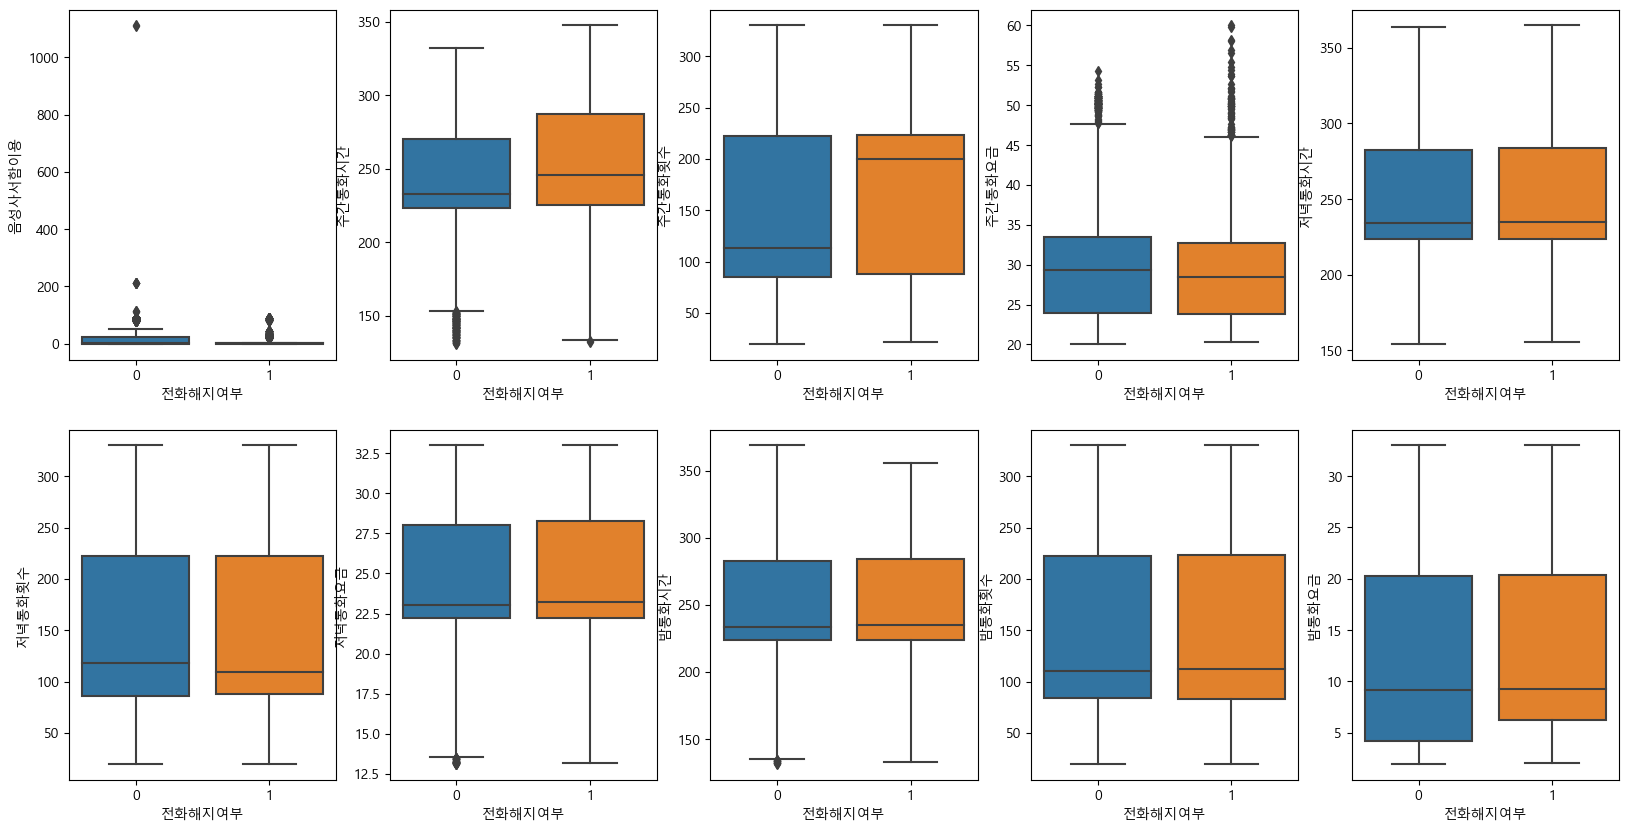

In [17]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['음성사서함이용'], ax=ax[0][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화시간'], ax=ax[0][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화횟수'], ax=ax[0][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['주간통화요금'], ax=ax[0][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화시간'], ax=ax[0][4])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화횟수'], ax=ax[1][0])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['저녁통화요금'], ax=ax[1][1])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화시간'], ax=ax[1][2])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화횟수'], ax=ax[1][3])
sns.boxplot(x=df_new3['전화해지여부'], y=df_new3['밤통화요금'], ax=ax[1][4])

In [18]:
# autogluon 학습을 위한 데이터 형태로 변환
train = TabularDataset(df_new3.drop(['ID'], axis=1))
test = TabularDataset(test_df.drop(['ID'], axis=1))

In [19]:
# 이렇게 한 줄만 작성하면 내부에서 알아서 학습해줍니다.
predictor = TabularPredictor(label='전화해지여부', eval_metric='f1_macro',).fit(train)

No path specified. Models will be saved in: "AutogluonModels\ag-20230322_040918\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230322_040918\"
AutoGluon Version:  0.7.0
Python Version:     3.8.0
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.19041
Train Data Rows:    18174
Train Data Columns: 12
Label Column: 전화해지여부
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    42561.19 MB
	Train Data (Original)  Memory Usage: 1.74 MB (

[1000]	valid_set's binary_logloss: 0.249206	valid_set's f1_macro: 0.691769
[2000]	valid_set's binary_logloss: 0.225071	valid_set's f1_macro: 0.761429
[3000]	valid_set's binary_logloss: 0.224256	valid_set's f1_macro: 0.78093
[4000]	valid_set's binary_logloss: 0.232982	valid_set's f1_macro: 0.795563


	0.7984	 = Validation score   (f1_macro)
	10.78s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's binary_logloss: 0.222256	valid_set's f1_macro: 0.756316
[2000]	valid_set's binary_logloss: 0.239399	valid_set's f1_macro: 0.782776


	0.7865	 = Validation score   (f1_macro)
	5.76s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestGini ...
	0.7352	 = Validation score   (f1_macro)
	1.21s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: RandomForestEntr ...
	0.7386	 = Validation score   (f1_macro)
	1.12s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
	0.7583	 = Validation score   (f1_macro)
	18.57s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesGini ...
	0.7484	 = Validation score   (f1_macro)
	0.55s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTreesEntr ...
	0.7487	 = Validation score   (f1_macro)
	0.54s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	0.6539	 = Validation score   (f1_macro)
	12.98s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: XGBoost ...
	0.7893	 = Validation score   (f1_macro)
	7.04s	 = Training   runtime
	0.03

[1000]	valid_set's binary_logloss: 0.275915	valid_set's f1_macro: 0.779007


	0.78	 = Validation score   (f1_macro)
	5.68s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	0.7984	 = Validation score   (f1_macro)
	1.83s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 124.02s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20230322_040918\")


In [20]:
# 각각의 모델의 훈련 성능을 평가할 수 있음
ld_board = predictor.leaderboard(train, silent=True)

ld_board

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.981265,0.789278,0.316154,0.033909,7.036204,0.316154,0.033909,7.036204,1,True,11
1,LightGBM,0.981005,0.786511,0.287232,0.030918,5.764576,0.287232,0.030918,5.764576,1,True,4
2,LightGBMLarge,0.980631,0.779974,0.349066,0.032912,5.675813,0.349066,0.032912,5.675813,1,True,13
3,KNeighborsDist,0.979644,0.782834,0.174501,0.025930,0.045877,0.174501,0.025930,0.045877,1,True,2
4,ExtraTreesGini,0.978706,0.748440,0.198501,0.055851,0.553376,0.198501,0.055851,0.553376,1,True,8
5,ExtraTreesEntr,0.978594,0.748717,0.201614,0.055851,0.543641,0.201614,0.055851,0.543641,1,True,9
6,RandomForestEntr,0.978299,0.738600,0.166554,0.056848,1.116189,0.166554,0.056848,1.116189,1,True,6
7,RandomForestGini,0.978163,0.735218,0.169547,0.058843,1.209785,0.169547,0.058843,1.209785,1,True,5
8,LightGBMXT,0.972226,0.798377,0.605380,0.061807,10.776197,0.605380,0.061807,10.776197,1,True,3
9,WeightedEnsemble_L2,0.972226,0.798377,0.612361,0.065794,12.604337,0.006981,0.003987,1.828140,2,True,14


In [21]:
# 예측하기
pred_y = predictor.predict(test)

In [22]:
# 제출 파일 생성
submit = pd.DataFrame()

submit['ID'] = test_df['ID']
submit['전화해지여부'] = pred_y

submit.to_csv('submit2.csv', index=False)